# Viewer

This is a viewer were you can see and debug your clicks and annotations.

For now two visualizations are available:

- display points on video
- display the distribution of the clicks through the time

```to use it take a look at FLAGS class```

In [1]:
# environment setup
import random

import cv2
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from data_loader import ClickAnnotation, VideoIterator

### [single point] Display clicked point in video

shows the clicked points in the video.

In [2]:
# load data

class FLAGS: # parameters
    video_path = '/data/side_seing/sideseeing-hospitals/data/Santos_CHE/Block01-2024-03-09-15-43-12-506/video.mp4'
    anntation_path = "/data/side_seing/sideseeing-hospitals/data/Santos_CHE/Block01-2024-03-09-15-43-12-506/annotations_raw"
    image_path = '/data/side_seing/vlcsnap-2024-04-10-17h47m07s979.png'


In [3]:
# render clicks
import numpy as np

class ClickRender:

    def __init__(self, clicks: ClickAnnotation, video_path: str):

        num_colors = len(clicks.annotators)
        self.colors = {i:col for i, col in enumerate(random_colors(num_colors))}
        self.video_path = video_path
        self.clicks = clicks

    def render_frame(self, frame, points):
        input_prob = np.zeros(frame.shape)

        # draw each point
        for i, point in enumerate(points):
            point = list(map(int, point))
            input_prob = cv2.circle(input_prob, point, 30, self.colors[i], -1).astype('uint8')
        
        frame = cv2.addWeighted(input_prob, 0.3, frame, 0.7, 0)
        return frame

    def render_click_on_video(self, show=True, save=False):
        """
        Iterate through the video frames and display it.
    
        Args:
            show: If show is True the video will be displayed on screen
            save: If True the video will be saved
        """

        num_annotators = len(self.clicks.annotators)
        users_color = random_colors(num_annotators)
    
        video_iterator = VideoIterator(self.video_path)
        for frame, click in zip(video_iterator, self.clicks):

            frame = self.render_frame(frame, click)

            if show:
                cv2.imshow('Video', frame)
                if cv2.waitKey(27) & 0xFF == ord('q'):
                    break
        
        if save:
            pass

        if show: cv2.destroyAllWindows()

    def plot_points_distribution(self):
        """
        Uses KDE to plot the points distribution.
        """

        df = self.clicks.clicks
        df_long = pd.concat([df[[f'x_{i}', f'y_{i}']].rename(columns={f'x_{i}': 'x', f'y_{i}': 'y'}).assign(user=f'id_{i}')
                            for i in range(len(self.clicks.annotators))], ignore_index=True)

        # Plot
        sns.kdeplot(data=df_long, x='x', y='y', hue='user')
        plt.show()

def random_colors(num_colors):
    """
    Generate random colors (RGB).
    """
    return [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(num_colors)]
   

In [4]:
# Iterating through the video frames and click annotations to display it

frame_clicks = ClickAnnotation(FLAGS.anntation_path, interpolate=True)

render = ClickRender(frame_clicks, FLAGS.video_path)
render.render_click_on_video()

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to target thread (0x55dfde1591a0)

QObject::moveToThread: Current thread (0x55dfde1591a0) is not the object's thread (0x55dfe03d6910).
Cannot move to tar

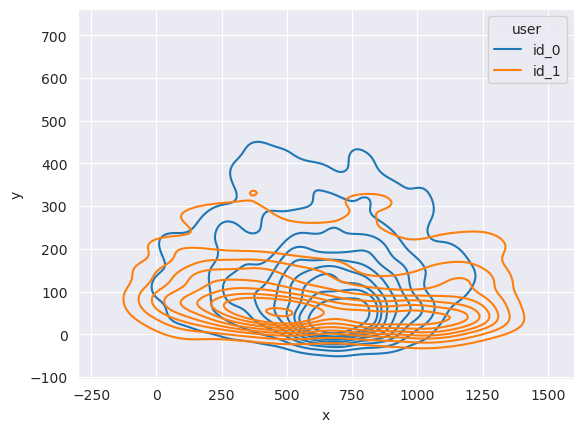

In [5]:
# points distribuition

render = ClickRender(frame_clicks, FLAGS.video_path)
render.plot_points_distribution()

# create blobs

TODO: create a sepparated and independent file to this

In [ ]:
def create_gaussian_mixture(images, sigmas, weights=None):
    """
    Create a Gaussian mixture from a list of masks represented by images.

    Parameters:
        images (list of numpy arrays): List of images representing masks.
        sigmas (list of floats): List of standard deviations for Gaussian kernels.
        weights (list of floats, optional): List of weights for each Gaussian component. If None, equal weights are used.

    Returns:
        numpy array: Gaussian mixture of the masks.
    """
    if weights is None:
        weights = np.ones(len(sigmas)) / len(sigmas)

    # Ensure weights sum up to 1
    weights = np.array(weights) / np.sum(weights)

    # Initialize the mixture
    mixture = np.zeros_like(images[0], dtype=float)

    # Add each Gaussian component to the mixture
    for image, sigma, weight in zip(images, sigmas, weights):
        
        mixture += weight * gaussian_mask

    # Normalize the mixture to have values between 0 and 1
    mixture = np.clip(mixture, 0, 1)

    return mixture


criar mistura gaussiana, consigo fazer rapidao

In [ ]:
import cv2
import numpy as np

def gaussian_mixture(masks):
    all_masks = np.sum(masks, axis=-1)
    print(all_masks)
    print(all_masks.shape)
    all_masks = ((all_masks/all_masks.max())*255).astype(np.uint8)
    return all_masks
#TODO: debugar essas mascaras

def display_blob():

    video_iterator = VideoIterator(FLAGS.video_path)
    for frame in video_iterator:
        
        if (video_iterator.current_frame == clicks.index).sum() < 2:
            continue

        points = list(zip(clicks.loc[video_iterator.current_frame]['x'], clicks.loc[video_iterator.current_frame]['y']))
        masks = [gen_gaussian_blob(frame.shape, *point) for point in points]
        final_mask = gaussian_mixture(masks)
        return
        cv2.imshow('Video', final_mask)
        if cv2.waitKey(27) & 0xFF == ord('q'):
            break

    # cv2.destroyAllWindows()

image_shape = (600, 400)  # Shape of the image
center_x, center_y = 150, 200  # Center coordinates of the Gaussian blob
sigma = 120  # Sigma value for Gaussian distribution

# Draw the Gaussian blob mask
# gaussian_blob_mask = gen_gaussian_blob(image_shape, center_x, center_y, sigma)
display_blob()
# Display the Gaussian blob mask
# cv2.imshow("Gaussian Blob Mask", gaussian_blob_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
